In [1]:
from keras.utils import np_utils
import numpy as np
import tensorflow as tf
import os
from PIL import Image
from PIL import ImageFilter
import image_utils as iu
import uuid
from shutil import copy2


In [36]:
data_path = 'data'
classification_path = os.path.join(data_path, 'classification')
# original images
original_data_path = os.path.join(classification_path, 'original')
plantain_original_data_path = os.path.join(original_data_path, 'plantain')
others_original_data_path = os.path.join(original_data_path, 'others')
# divided images
divided_data_path = os.path.join(classification_path, 'divided')
plantain_divided_data_path = os.path.join(divided_data_path, 'plantain')
others_divided_data_path = os.path.join(divided_data_path, 'others')
# final images
final_data_path = os.path.join(classification_path, 'final')
plantain_final_data_path = os.path.join(final_data_path, 'plantain')
others_final_data_path = os.path.join(final_data_path, 'others')
#train
training_path = os.path.join(classification_path, 'training')
train_path = os.path.join(training_path, 'train')
train_plantain_path = os.path.join(train_path, 'plantain')
train_others_path = os.path.join(train_path, 'others')
#val
val_path = os.path.join(training_path, 'val')
val_plantain_path = os.path.join(val_path, 'plantain')
val_others_path = os.path.join(val_path, 'others')
iu.create_dir_if_not_exists(classification_path)


In [3]:
# Augments images by rotation.
def aug_image(image):
    images_augmented = []
    image = image.resize((320, 160))
    new_im = image
    images_augmented.append(new_im)
    images_augmented.append(new_im.rotate(90))
    images_augmented.append(new_im.rotate(180))
    images_augmented.append(new_im.rotate(270))
    new_im = image.transpose(Image.FLIP_LEFT_RIGHT)
    images_augmented.append(new_im)
    images_augmented.append(new_im.rotate(90))
    images_augmented.append(new_im.rotate(180))
    images_augmented.append(new_im.rotate(270))
    return images_augmented


In [4]:
# stores the path of an image and a mask pair
class DataLabelPair:
    def __init__(self, data_real_path, label_path):
        self.data_real_path = data_real_path
        self.label_path = label_path

In [10]:
plantain_original_images_path = iu.get_all_files(plantain_original_data_path, '*.png', True)
others_original_images_path = iu.get_all_files(others_original_data_path, '*.png', True)


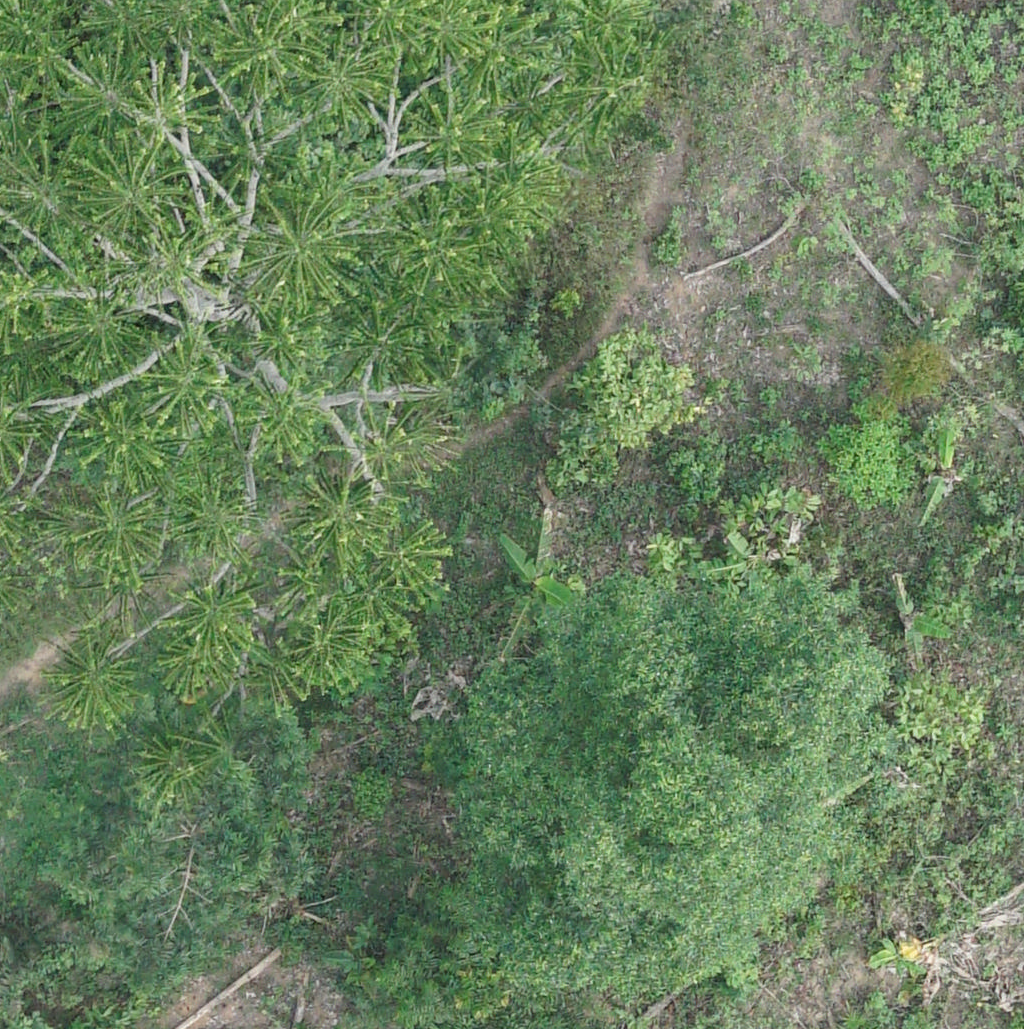

In [11]:
iu.read_image(plantain_original_images_path[0])


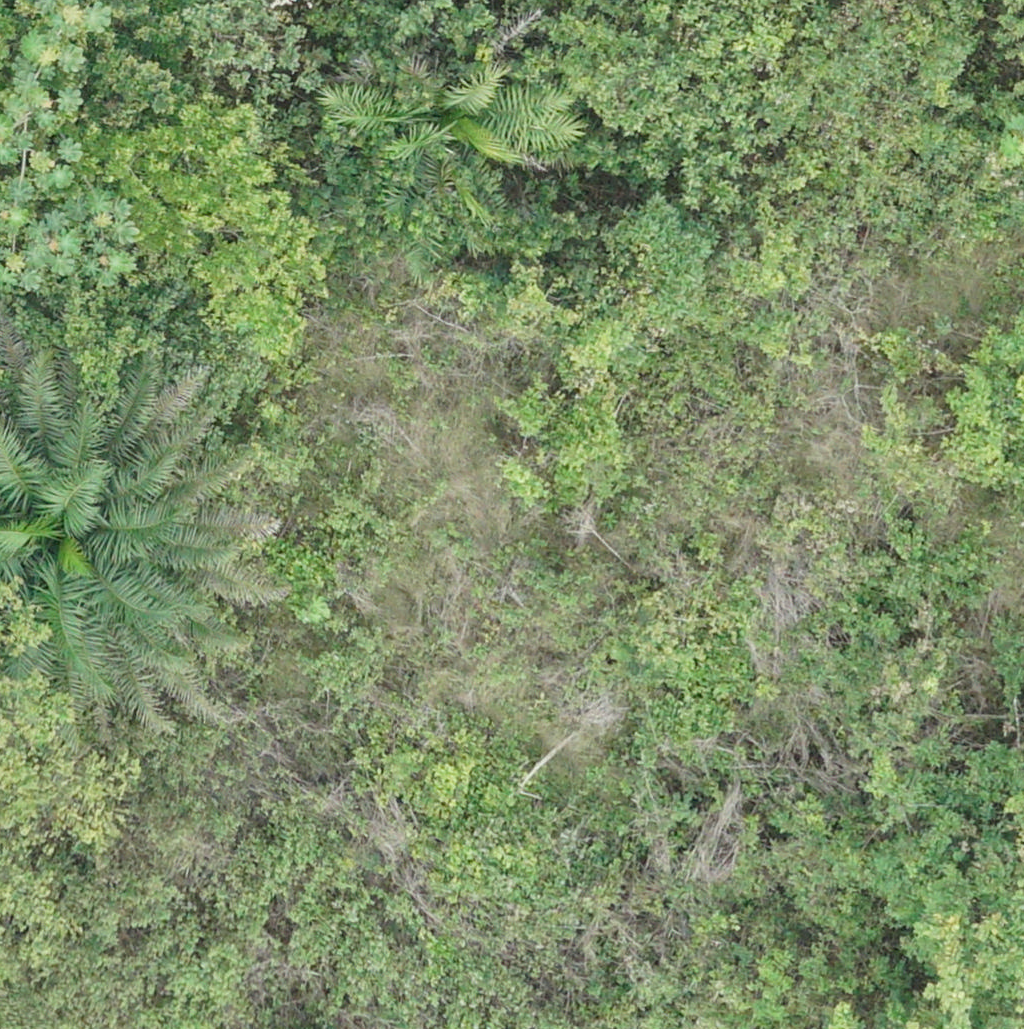

In [12]:
iu.read_image(others_original_images_path[0])


In [15]:
# Splits image into specified rows and columns
def split_image(image, row_count, col_count):
    parts = []
    width, height = image.size
    left = 0
    top = 0
    right = width / col_count
    bottom = height / row_count
    for r in range(row_count):
        top = int(r * (height / row_count))
        bottom = int(top + (height / row_count))
        for c in range(col_count):
            left = int(c * (width / col_count))
            right = int(left + (width / col_count))
            part = image.crop((left, top, right, bottom))
            parts.append(part)
    return parts

# Augments images by rotation.


def aug_image(image):
    images_augmented = []
    image = image.resize((512, 512))
    new_im = image
    images_augmented.append(new_im)
    images_augmented.append(new_im.rotate(90))
    images_augmented.append(new_im.rotate(180))
    images_augmented.append(new_im.rotate(270))
    new_im = image.transpose(Image.FLIP_LEFT_RIGHT)
    images_augmented.append(new_im)
    images_augmented.append(new_im.rotate(90))
    images_augmented.append(new_im.rotate(180))
    images_augmented.append(new_im.rotate(270))
    return images_augmented


In [17]:
# images are divided into 9 parts and saved on disk.
# This reduces the dimension of the images and also increases the training data.
# Divide the plantain images.
iu.create_dir_if_not_exists(divided_data_path)
iu.create_dir_if_not_exists(plantain_divided_data_path)
iu.create_dir_if_not_exists(others_divided_data_path)
for image_path in plantain_original_images_path:
    row_count = 2
    col_count = 2
    part_count = col_count * row_count
    real_image = iu.read_image(image_path, 'RGB')
    real_image_parts = split_image(real_image, row_count, col_count)
    for x in range(part_count):
        part_filename = str(uuid.uuid4()) + '.png'
        real_image_part = real_image_parts[x]
        #
        real_image_part.save(os.path.join(
            plantain_divided_data_path, part_filename))


In [18]:
# images are divided into 9 parts and saved on disk.
# This reduces the dimension of the images and also increases the training data.
# Divide other images
iu.create_dir_if_not_exists(divided_data_path)
iu.create_dir_if_not_exists(plantain_divided_data_path)
iu.create_dir_if_not_exists(others_divided_data_path)
for image_path in others_original_images_path:
    row_count = 2
    col_count = 2
    part_count = col_count * row_count
    real_image = iu.read_image(image_path, 'RGB')
    real_image_parts = split_image(real_image, row_count, col_count)
    for x in range(part_count):
        part_filename = str(uuid.uuid4()) + '.png'
        real_image_part = real_image_parts[x]
        #
        real_image_part.save(os.path.join(
            others_divided_data_path, part_filename))


In [19]:
#Images that do not contain any information is deleted from storage.
others_divided_images_path = iu.get_all_files(others_divided_data_path)

In [23]:
del_count = 0
i = 0
for image_path in others_divided_images_path:
    real_image = iu.read_image(os.path.join(
        others_divided_data_path, image_path))
    np_real_image = np.asarray(real_image)
    if np_real_image.max() == 0:
        os.remove(os.path.join(others_divided_data_path, image_path))
        del_count += 1
    i += 1
    iu.print_progress(i, len(others_divided_images_path))
print(' ', del_count, 'files deleted')


Progress: [##################################################] 100.0%  93 files deleted


In [30]:

plantain_divided_images_path = iu.get_all_files(plantain_divided_data_path, '*.png',True)
others_divided_images_path = iu.get_all_files(others_divided_data_path, '*.png',True)

In [ ]:
# images are augmented and saved on disk.
iu.create_dir_if_not_exists(final_data_path)
iu.create_dir_if_not_exists(plantain_final_data_path)
iu.create_dir_if_not_exists(others_final_data_path)
for image_path in plantain_divided_images_path:
    real_image = iu.read_image(image_path, 'RGB')
    real_aug_images = aug_image(real_image)
    for x in range(len(real_aug_images)):
        part_filename = str(uuid.uuid4()) + '.png'
        real_image_part = real_aug_images[x]
        #
        real_image_part.save(os.path.join(
            plantain_final_data_path, part_filename))
        
for image_path in others_divided_images_path:
    real_image = iu.read_image(image_path, 'RGB')
    # real_aug_images = aug_image(real_image)
    real_aug_images = [real_image]
    for x in range(len(real_aug_images)):
        part_filename = str(uuid.uuid4()) + '.png'
        real_image_part = real_aug_images[x]
        #
        real_image_part.save(os.path.join(
            others_final_data_path, part_filename))


In [33]:
# Splits dataset into training, validation and test sets.
def train_val_test_split(val_per, test_per, input_data, labels=None):
    if labels is not None and len(input_data) != len(labels):
        raise Exception("input data and label length mismatch")
    data_len = len(input_data)
    val_len = int(data_len * (val_per / 100))
    test_len = int(data_len * (test_per / 100))
    x_val = input_data[0: val_len]
    x_test = input_data[val_len: val_len + test_len]
    x_train = input_data[val_len + test_len: data_len]
    if labels is not None:
        y_val = labels[0: val_len]
        y_test = labels[val_len: val_len + test_len]
        y_train = labels[val_len + test_len: data_len]
        return (x_train, y_train), (x_val, y_val), (x_test, y_test)
    else:
        return x_train, x_val, x_test


In [37]:
#train
iu.create_dir_if_not_exists(training_path)
iu.create_dir_if_not_exists(train_path)
iu.create_dir_if_not_exists(train_plantain_path)
iu.create_dir_if_not_exists(train_others_path)
#val
iu.create_dir_if_not_exists(val_path)
iu.create_dir_if_not_exists(val_plantain_path)
iu.create_dir_if_not_exists(val_others_path)

In [40]:
plantain_final_images_path = iu.get_all_files(plantain_final_data_path, '*.png', True)
others_final_images_path = iu.get_all_files(others_final_data_path, '*.png', True)


In [42]:
train_images, val_images, test_images = train_val_test_split(
    15, 0, plantain_final_images_path)
print('Train length:', len(train_images))
print('Val length:', len(val_images))
print('Test length', len(test_images))


Train length: 742
Val length: 130
Test length 0


In [43]:
# copy training images to training folder
for path in train_images:
    copy2(path, os.path.join(
        train_plantain_path, os.path.basename(path)))


In [44]:
# copy training images to training folder
for path in val_images:
    copy2(path, os.path.join(
        val_plantain_path, os.path.basename(path)))

In [45]:
others_train_images, others_val_images, others_test_images = train_val_test_split(
    15, 0, others_final_images_path)
print('Train length:', len(others_train_images))
print('Val length:', len(others_val_images))
print('Test length', len(others_test_images))


Train length: 1779
Val length: 313
Test length 0


In [46]:
# copy training images to training folder
for path in others_train_images:
    copy2(path, os.path.join(
        train_others_path, os.path.basename(path)))


In [47]:
# copy training images to training folder
for path in others_val_images:
    copy2(path, os.path.join(
        val_others_path, os.path.basename(path)))
